In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LinearRegression

In [4]:



df_schema_2017 = pd.read_csv('stack_overflow/survey_results_schema_2017.csv')
df_schema_2017 = pd.read_csv('stack_overflow/survey_results_schema_2023.csv')
df_schema_2018 = pd.read_csv('stack_overflow/survey_results_schema_2018.csv')
df_schema_2019 = pd.read_csv('stack_overflow/survey_results_schema_2019.csv')
df_schema_2020 = pd.read_csv('stack_overflow/survey_results_schema_2018.csv')

df_survey_2017 = pd.read_csv('stack_overflow/survey_results_public_2017.csv')
df_survey_2018 = pd.read_csv('stack_overflow/survey_results_public_2018.csv')
df_survey_2019 = pd.read_csv('stack_overflow/survey_results_public_2019.csv')
df_survey_2020 = pd.read_csv('stack_overflow/survey_results_public_2020.csv')
df_survey_2021 = pd.read_csv('stack_overflow/survey_results_public_2021.csv')
df_survey_2022 = pd.read_csv('stack_overflow/survey_results_public_2022.csv')
df_survey_2023 = pd.read_csv('stack_overflow/survey_results_public_2023.csv')
df_survey_2024 = pd.read_csv('stack_overflow/survey_results_public_2024.csv')


print(df_survey_2017.head())
print(df_survey_2017.shape[0])
print(df_survey_2017.shape[1])

print(df_schema_2017.head())
print(df_schema_2017.shape[0])
print(df_schema_2017.shape[1])


/var/folders/mv/p9mr7xh16q98xgxnzr9h0b6h0000gn/T/ipykernel_6985/897413831.py:8: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df_survey_2018 = pd.read_csv('stack_overflow/survey_results_public_2018.csv')


   Respondent                                       Professional  \
0           1                                            Student   
1           2                                            Student   
2           3                             Professional developer   
3           4  Professional non-developer who sometimes write...   
4           5                             Professional developer   

                ProgramHobby         Country      University  \
0                  Yes, both   United States              No   
1                  Yes, both  United Kingdom  Yes, full-time   
2                  Yes, both  United Kingdom              No   
3                  Yes, both   United States              No   
4  Yes, I program as a hobby     Switzerland              No   

                         EmploymentStatus  \
0  Not employed, and not looking for work   
1                      Employed part-time   
2                      Employed full-time   
3                      Emp

In [26]:
column_names = df_survey.columns.tolist()
print("Liste der Spaltennamen:")
print(column_names)

Liste der Spaltennamen:
['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType', 'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast', 'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF', 'ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'JobSeekingStatus', 'HoursPerWeek', 'LastNewJob', 'AssessJobIndustry', 'AssessJobRole', 'AssessJobExp', 'AssessJobDept', 'AssessJobTech', 'AssessJobProjects', 'A

In [28]:
def calculate_nan_percentage(df):
    nan_percentage = df.isna().mean() * 100
    return nan_percentage

nan_percentage = calculate_nan_percentage(df_survey)
#print("Prozentualer Anteil an NaN-Werten pro Spalte:")
#print(nan_percentage)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
nan_percentage_df = nan_percentage.reset_index()
nan_percentage_df.columns = ['Column', 'NaN_Percentage']

display(nan_percentage_df)

,Column,NaN_Percentage
0,Respondent,0.000000
1,Professional,0.000000
2,ProgramHobby,0.000000
3,Country,0.000000
4,University,0.000000
5,EmploymentStatus,0.000000
6,FormalEducation,0.000000
7,MajorUndergrad,16.638776
8,HomeRemote,14.367995
9,CompanySize,24.264477


In [5]:
def drop_columns_with_high_nan(df, threshold=0.9):

    nan_percentage = df.isna().mean()
    columns_to_keep = nan_percentage[nan_percentage <= threshold].index
    df_cleaned = df[columns_to_keep]
    return df_cleaned

In [6]:
df_survey_2017 = drop_columns_with_high_nan(df_survey_2017)
df_survey_2018 = drop_columns_with_high_nan(df_survey_2018)
df_survey_2019 = drop_columns_with_high_nan(df_survey_2019)
df_survey_2020 = drop_columns_with_high_nan(df_survey_2020)
df_survey_2021 = drop_columns_with_high_nan(df_survey_2021)
df_survey_2022 = drop_columns_with_high_nan(df_survey_2022)
df_survey_2023 = drop_columns_with_high_nan(df_survey_2023)
df_survey_2024 = drop_columns_with_high_nan(df_survey_2024)

In [10]:
print(df_survey_cleaned.shape[1])

141


In [36]:
display(df_schema_2017)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
5,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
6,QID127,Age,What is your age? *,True,MC,MAVR
7,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
8,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
9,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR


In [7]:
def count_individual(series):
    all_items = []
    for entry in series.dropna():
        items = entry.split(';')
        all_items.extend(item.strip() for item in items)
    item_counts = Counter(all_items)
    return item_counts


In [8]:
language_counts_2017 = count_individual(df_survey_2017['HaveWorkedLanguage'])
language_counts_2018 = count_individual(df_survey_2018['LanguageWorkedWith'])
language_counts_2019 = count_individual(df_survey_2019['LanguageWorkedWith'])
language_counts_2020 = count_individual(df_survey_2020['LanguageWorkedWith'])
language_counts_2021 = count_individual(df_survey_2021['LanguageHaveWorkedWith'])
language_counts_2022 = count_individual(df_survey_2022['LanguageHaveWorkedWith'])
language_counts_2023 = count_individual(df_survey_2023['LanguageHaveWorkedWith'])
language_counts_2024 = count_individual(df_survey_2024['LanguageHaveWorkedWith'])

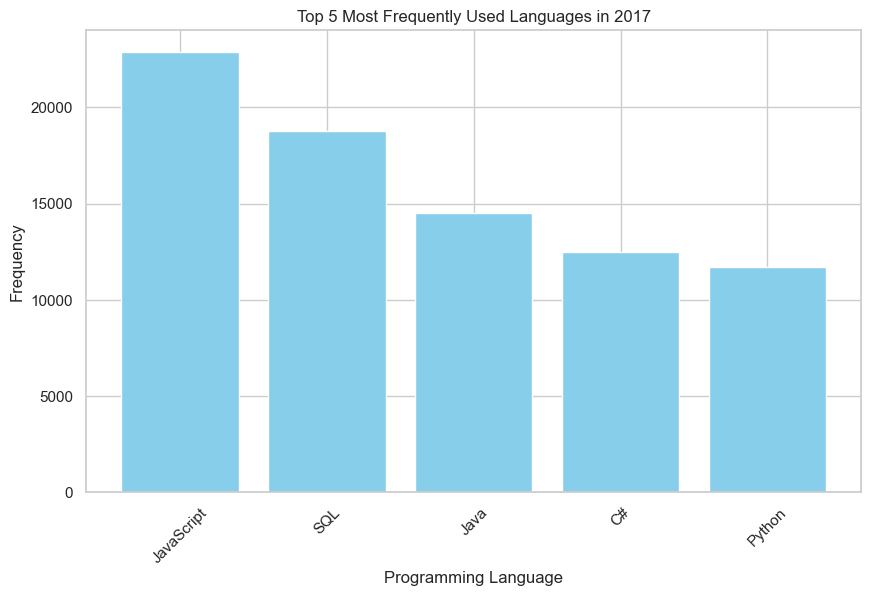

In [40]:
top_languages = dict(language_counts_2017.most_common(5))

plt.figure(figsize=(10, 6))
plt.bar(top_languages.keys(), top_languages.values(), color='skyblue')
plt.title('Top 5 Most Frequently Used Languages in 2017')
plt.xlabel('Programming Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

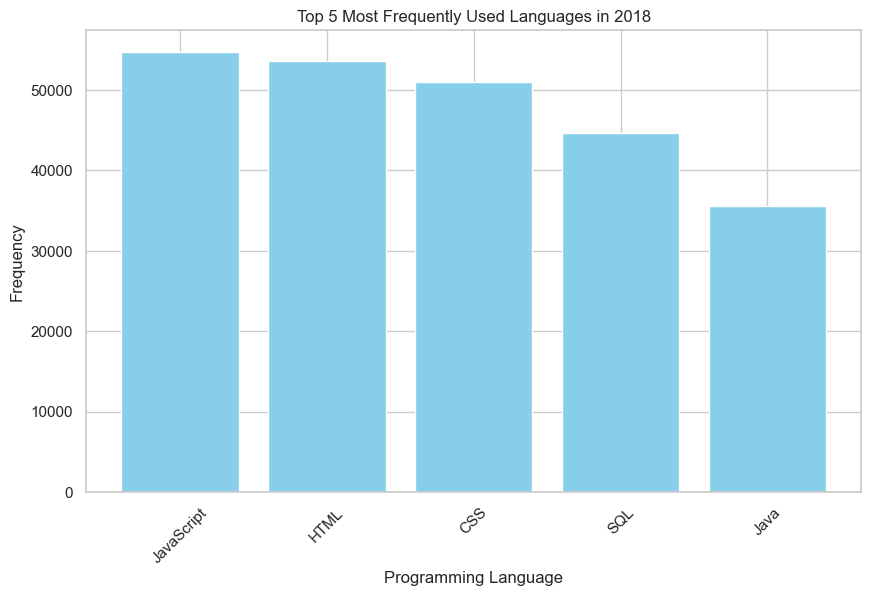

In [41]:
top_languages = dict(language_counts_2018.most_common(5))

plt.figure(figsize=(10, 6))
plt.bar(top_languages.keys(), top_languages.values(), color='skyblue')
plt.title('Top 5 Most Frequently Used Languages in 2018')
plt.xlabel('Programming Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
top_languages = dict(language_counts_2019.most_common(5))

plt.figure(figsize=(10, 6))
plt.bar(top_languages.keys(), top_languages.values(), color='skyblue')
plt.title('Top 5 Most Frequently Used Languages in 2019')
plt.xlabel('Programming Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
top_languages = dict(language_counts_2020.most_common(5))

plt.figure(figsize=(10, 6))
plt.bar(top_languages.keys(), top_languages.values(), color='skyblue')
plt.title('Top 5 Most Frequently Used Languages in 2020')
plt.xlabel('Programming Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
top_languages = dict(language_counts_2021.most_common(5))

plt.figure(figsize=(10, 6))
plt.bar(top_languages.keys(), top_languages.values(), color='skyblue')
plt.title('Top 5 Most Frequently Used Languages in 2021')
plt.xlabel('Programming Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
top_languages = dict(language_counts_2022.most_common(5))

plt.figure(figsize=(10, 6))
plt.bar(top_languages.keys(), top_languages.values(), color='skyblue')
plt.title('Top 5 Most Frequently Used Languages in 2022')
plt.xlabel('Programming Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
top_languages = dict(language_counts_2023.most_common(5))

plt.figure(figsize=(10, 6))
plt.bar(top_languages.keys(), top_languages.values(), color='skyblue')
plt.title('Top 5 Most Frequently Used Languages in 2023')
plt.xlabel('Programming Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

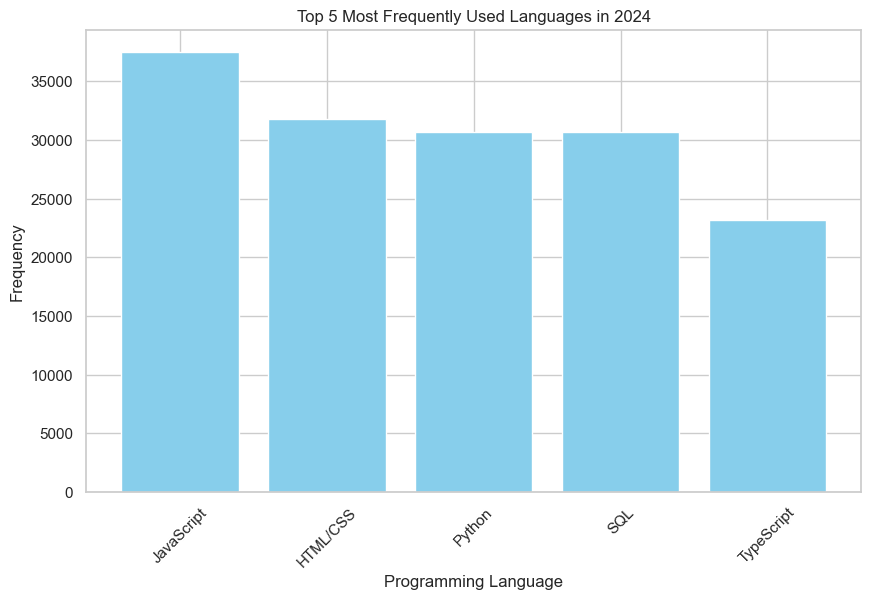

In [42]:
top_languages = dict(language_counts_2024.most_common(5))

plt.figure(figsize=(10, 6))
plt.bar(top_languages.keys(), top_languages.values(), color='skyblue')
plt.title('Top 5 Most Frequently Used Languages in 2024')
plt.xlabel('Programming Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

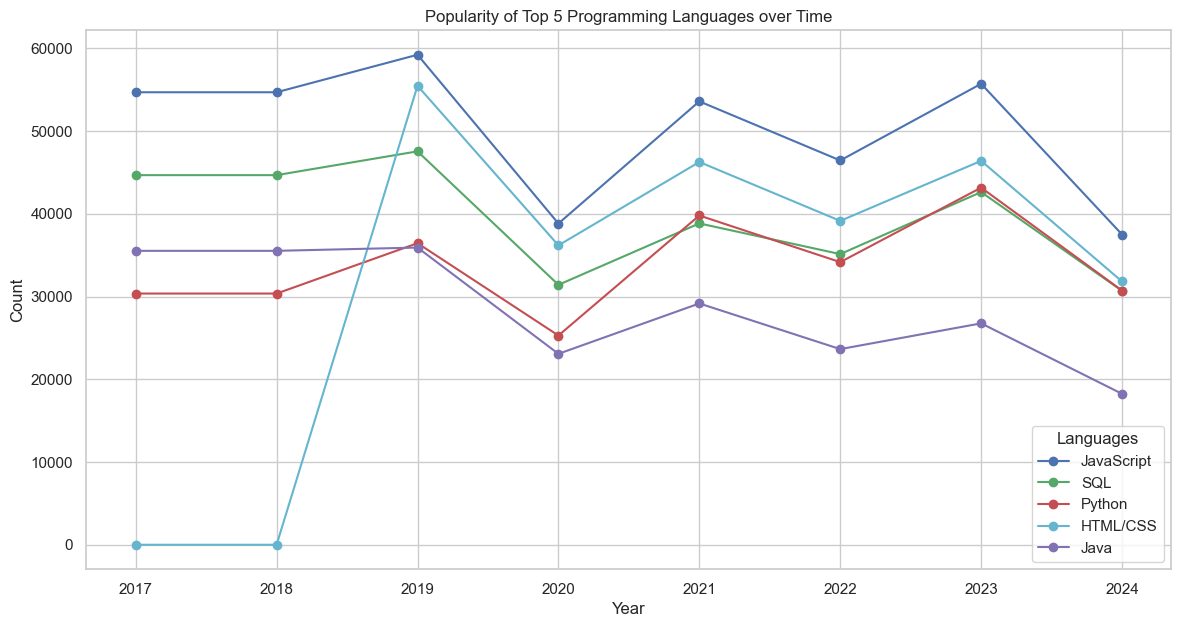

In [33]:
data = {
    2017: language_counts_2018,
    2018: language_counts_2018,
    2019: language_counts_2019,
    2020: language_counts_2020,
    2021: language_counts_2021,
    2022: language_counts_2022,
    2023: language_counts_2023,
    2024: language_counts_2024
}

language_data = pd.DataFrame(data).fillna(0)

language_data = language_data.T

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

top_languages = language_data.sum().nlargest(5).index

plt.figure(figsize=(14, 7))

for i, language in enumerate(top_languages):
    plt.plot(language_data.index, language_data[language], marker='o', color=colors[i % len(colors)], label=language)

plt.title('Popularity of Top 5 Programming Languages over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Languages')
plt.grid(True)
plt.show()



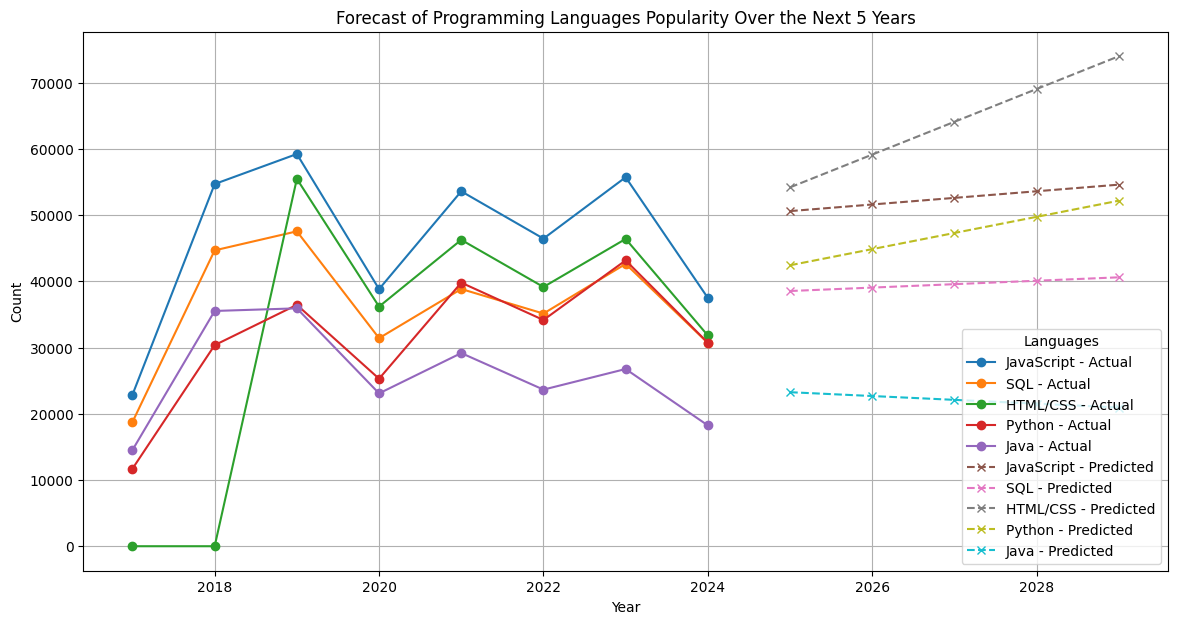

Predictions for JavaScript: [50598.         51596.58333333 52595.16666667 53593.75
 54592.33333333]
Predictions for SQL: [38532.71428571 39049.76190476 39566.80952381 40083.85714286
 40600.9047619 ]
Predictions for HTML/CSS: [54182.39285714 59132.36904762 64082.3452381  69032.32142857
 73982.29761905]
Predictions for Python: [42420.39285714 44857.78571429 47295.17857143 49732.57142857
 52169.96428571]
Predictions for Java: [23254.07142857 22676.14285714 22098.21428571 21520.28571429
 20942.35714286]


In [12]:
data = {
    2017: language_counts_2017,
    2018: language_counts_2018,
    2019: language_counts_2019,
    2020: language_counts_2020,
    2021: language_counts_2021,
    2022: language_counts_2022,
    2023: language_counts_2023,
    2024: language_counts_2024
}


language_data = pd.DataFrame(data).fillna(0)
language_data = language_data.T
top_languages = language_data.sum().nlargest(5).index

predictions = {}

for language in top_languages:
    
    X = np.array(language_data.index).reshape(-1, 1)
    y = language_data[language].values

   
    model = LinearRegression()
    model.fit(X, y)


    future_years = np.array([2025, 2026, 2027, 2028, 2029]).reshape(-1, 1)
    future_predictions = model.predict(future_years)

    predictions[language] = future_predictions


plt.figure(figsize=(14, 7))


for language in top_languages:
    plt.plot(language_data.index, language_data[language], marker='o', label=f'{language} - Actual')


for language, future_predictions in predictions.items():
    plt.plot(range(2025, 2030), future_predictions, marker='x', linestyle='--', label=f'{language} - Predicted')

plt.title('Forecast of Programming Languages Popularity Over the Next 5 Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Languages')
plt.grid(True)
plt.show()

for language, future_predictions in predictions.items():
    print(f"Predictions for {language}: {future_predictions}")


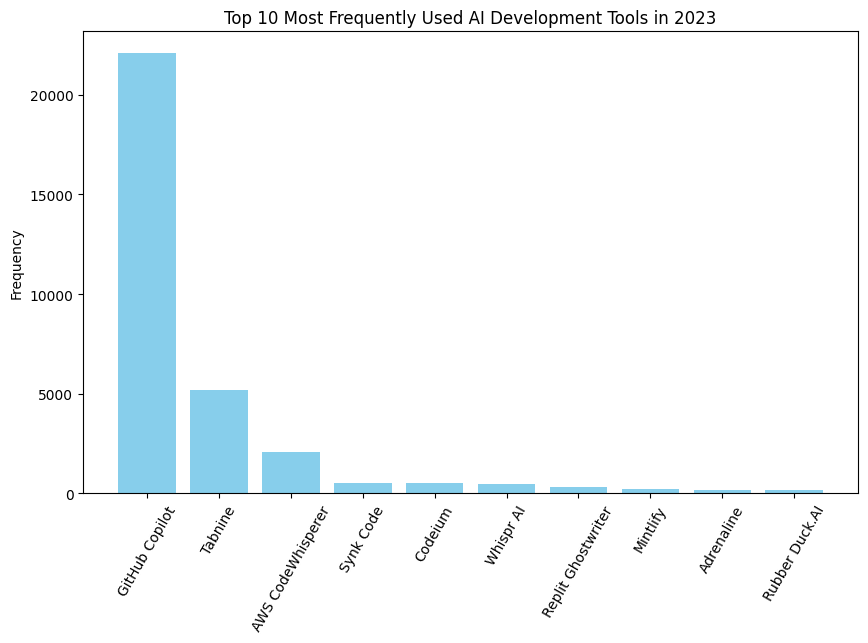

In [12]:
def count_individual(series):
    all_items = []
    for entry in series.dropna():
        items = entry.split(';')
        all_items.extend(item.strip() for item in items)
    item_counts = Counter(all_items)
    return item_counts

ai_counts = count_individual(df_survey_2023['AIDevHaveWorkedWith'])

top_ai_tools = dict(ai_counts.most_common(10))

plt.figure(figsize=(10, 6))
plt.bar(top_ai_tools.keys(), top_ai_tools.values(), color='skyblue')
plt.title('Top 10 Most Frequently Used AI Development Tools in 2023')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.show()

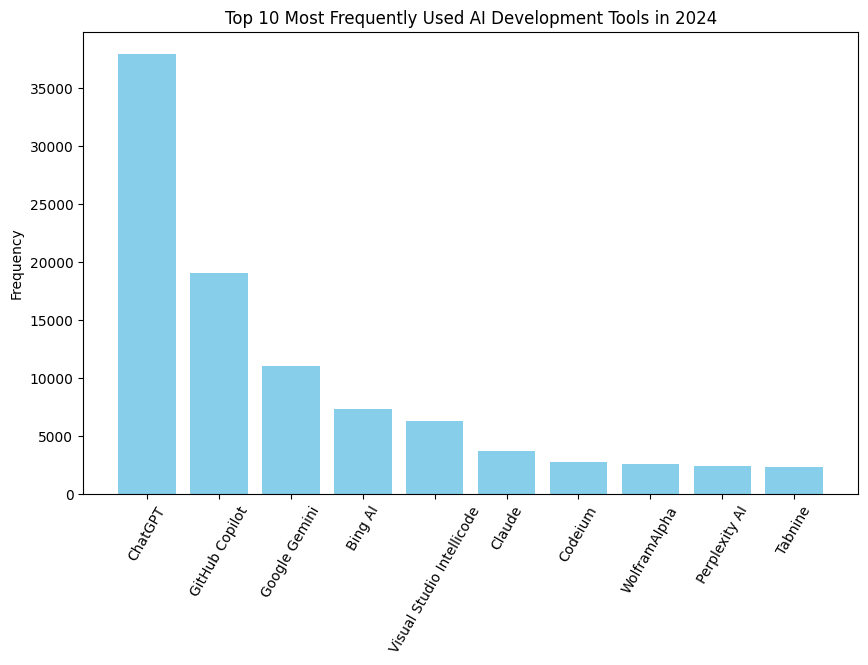

In [11]:
ai_counts_2024 = count_individual(df_survey_2024['AISearchDevHaveWorkedWith'])

top_ai_tools_2024 = dict(ai_counts_2024.most_common(10))

plt.figure(figsize=(10, 6))
plt.bar(top_ai_tools_2024.keys(), top_ai_tools_2024.values(), color='skyblue')
plt.title('Top 10 Most Frequently Used AI Development Tools in 2024')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.show()

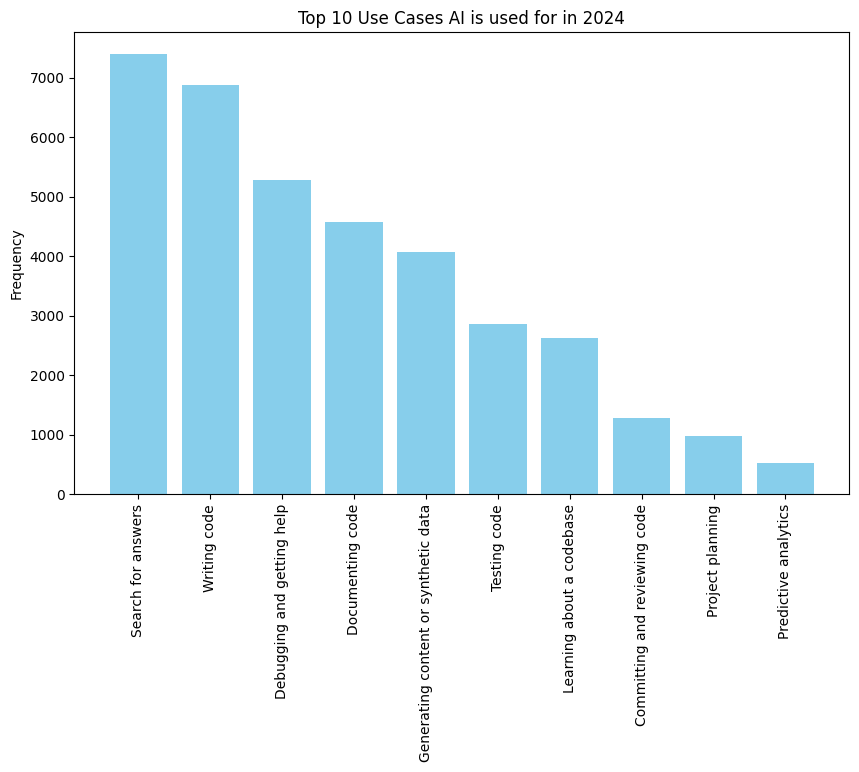

In [10]:
def count_individual(series):
    all_items = []
    for entry in series.dropna():
        items = entry.split(';')
        all_items.extend(item.strip() for item in items)
    item_counts = Counter(all_items)
    return item_counts

ai_counts = count_individual(df_survey_2024['AINextMuch more integrated'])

top_ai_tools = dict(ai_counts.most_common(10))

plt.figure(figsize=(10, 6))
plt.bar(top_ai_tools.keys(), top_ai_tools.values(), color='skyblue')
plt.title('Top 10 Use Cases AI is used for in 2024')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()